<a href="https://colab.research.google.com/github/prasadboyina/Heart-Disease-Classification-project/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SET**:https://drive.google.com/file/d/1oDS0_Gr1l_eIjm0U7fqyCpya94m5ARfC/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/heart (1) (1).csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

check if the data is having outliers

In [11]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

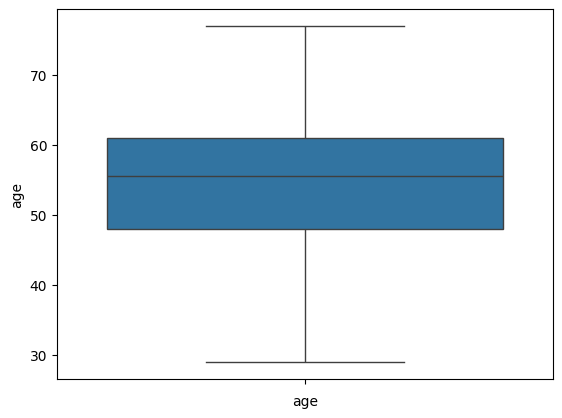

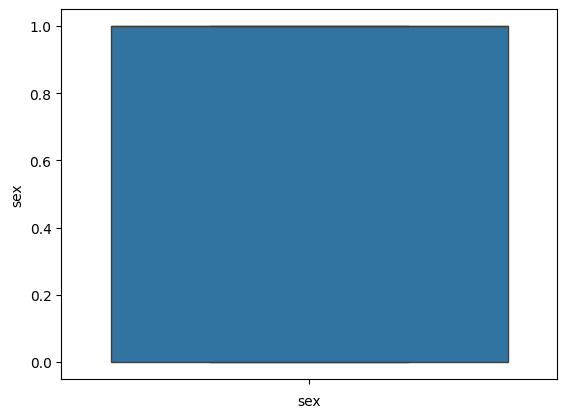

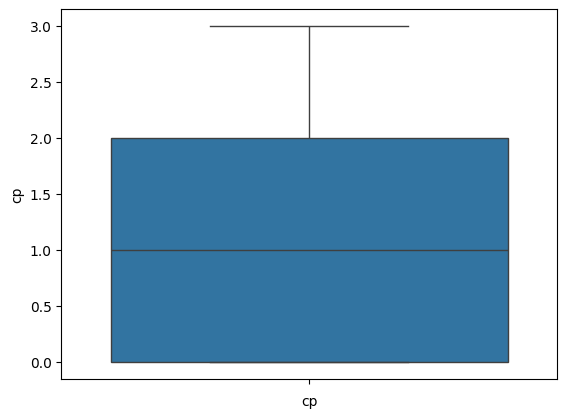

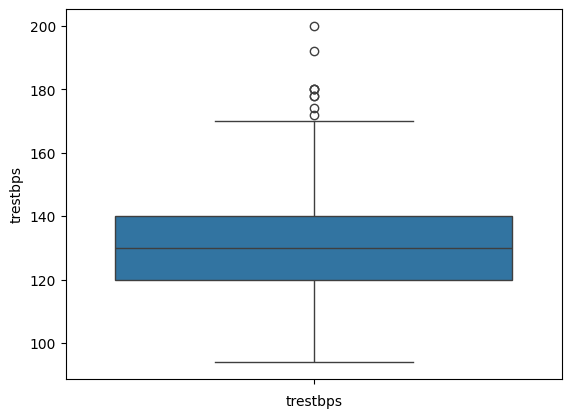

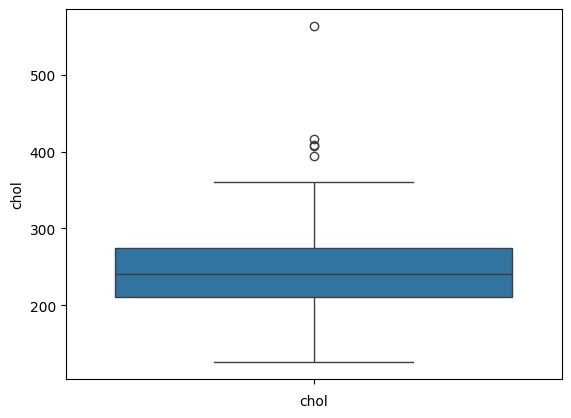

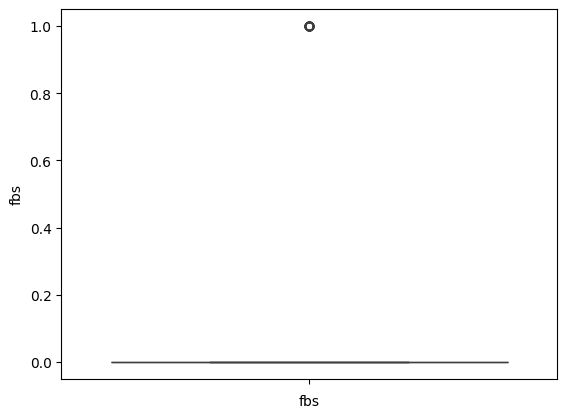

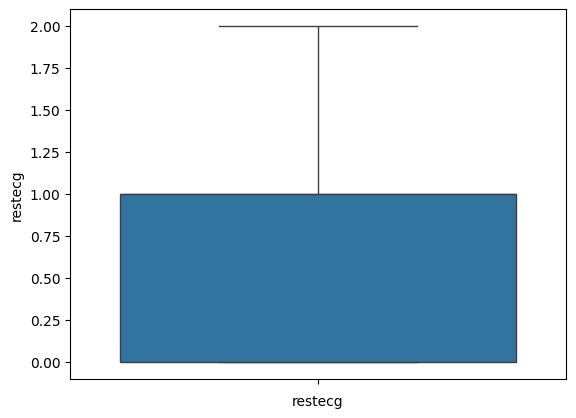

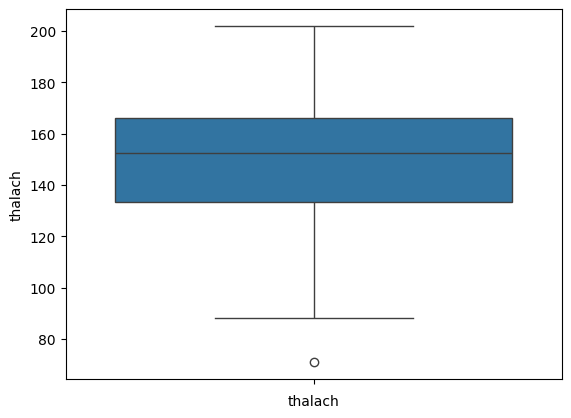

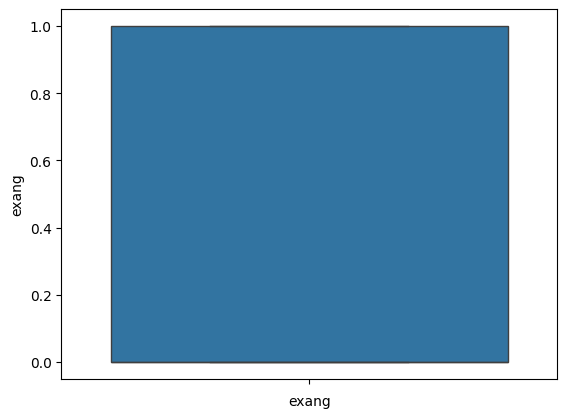

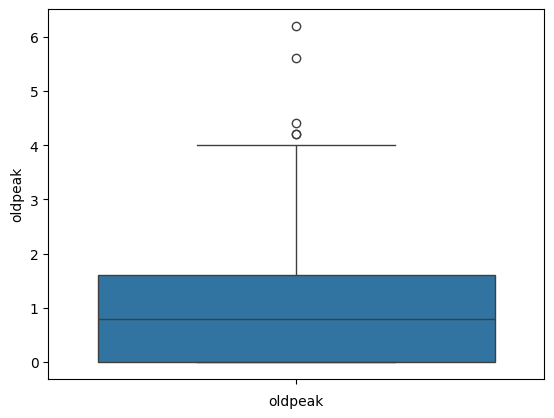

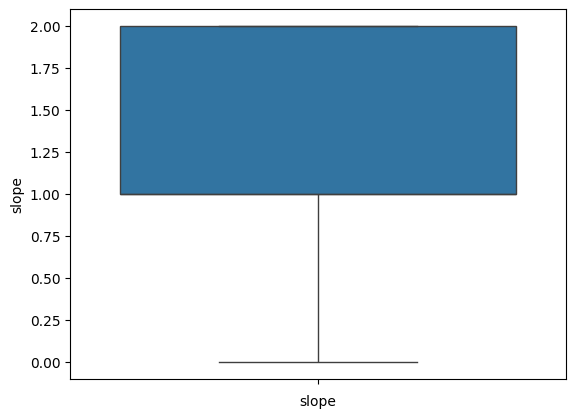

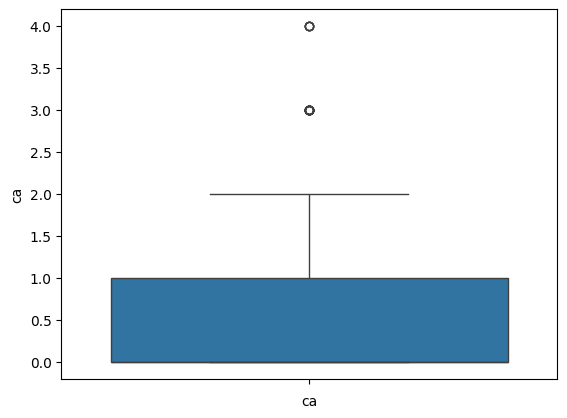

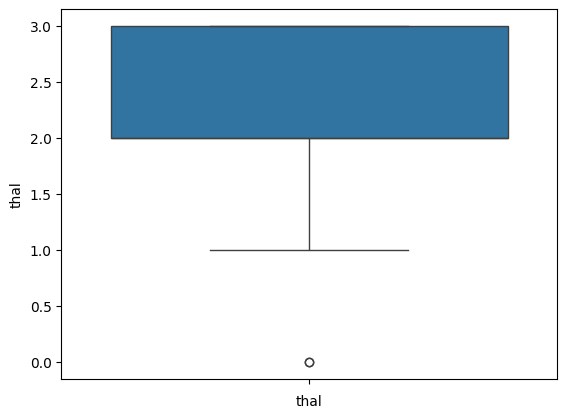

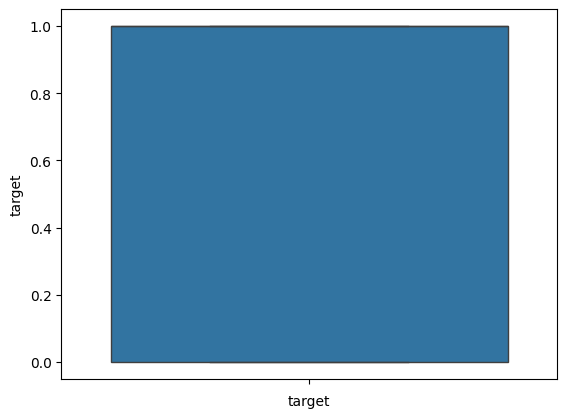

In [12]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()


Two resons  - Since the number of rows in the data is alsready less(302)

and since this is a medical data, we expect the data to have outliers

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [14]:
x=df.drop("target",axis=1)
y=df["target"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
dt.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

# Hyper Parameter tuning

#Hyperparameter tuning refers to the process of selecting the optimal values for the hyperparameters of a machine learning model.

#max depth -

max_depth is a parameter in decision tree algorithms that specifies the maximum depth or maximum number of levels allowed in the decision tree.

#min_samples_split - default=2

->min_samples_split is a parameter in decision tree algorithms
that determines the minimum number of samples required to split an internal node.
->It specifies the minimum number of samples that should be present in a node for the algorithm to consider splitting it further.

#min_samples_leaf - default = 1

-> min_samples_leaf is another parameter in decision tree algorithms that determines the minimum number of samples required to be present in a leaf node.
-> It specifies the minimum number of samples that should be in a leaf for the algorithm to consider it as a valid leaf node.



#"gini", "entropy"

gini--it measures how often a randomly chosen element from the dataset would be incorrectly classified

entropy is another measure of impurity or uncertainty that is used to evaluate how well a feature splits the data.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    #'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 13],#list(range(1,10))
    'min_samples_split': [2, 5, 10],#list(range(1,10))
    'min_samples_leaf': [1, 2, 5],#list(range(1,10))
}

# Initialize the Decision Tree model
DT = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(DT, param_grid, scoring='accuracy') # how you want to access the model, by using accuracy sore
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy: 0.7803571428571427
Test Accuracy: 0.8032786885245902


In [25]:

# Define parameter grid for tuning
param_grid = {
    #'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,10)),
    'min_samples_split': list(range(2,10)), # Changed to start from 2
    'min_samples_leaf': list(range(1,10))
}

# Initialize the Random Forest model
DT = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(DT, param_grid, scoring='accuracy') # how you want to access the model, by using accuracy sore
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Accuracy: 0.7967687074829932
Test Accuracy: 0.8032786885245902
